In [95]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
cancer_data = load_breast_cancer()
cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [57]:
data = pd.DataFrame(cancer_data.data)
data.columns = cancer_data.feature_names
data['target'] = cancer_data.target
data['class'] = data.target.apply(lambda x: cancer_data.target_names[x])

In [59]:
df_malignant  = data[data.target == 0]
df_benign = data[data.target == 1]

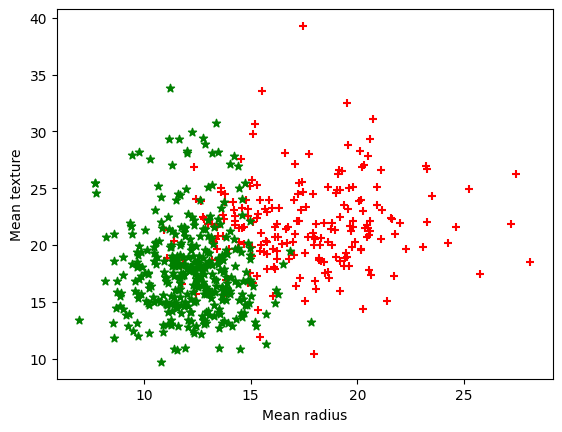

In [60]:
plt.xlabel('Mean radius')
plt.ylabel('Mean texture')
plt.scatter(df_malignant['mean radius'],df_malignant['mean texture'],color="red",marker="+")
plt.scatter(df_benign['mean radius'],df_benign['mean texture'],color="green",marker="*")

In [72]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns=['class','target']),data.target,test_size=0.3,random_state=75)

In [90]:
svc = SVC(C=1111)
svc.fit(x_train, y_train)
y_test_pred = svc.predict(x_test)
svc.score(x_test,y_test)

0.9766081871345029

In [91]:
svc = SVC(gamma="scale")
svc.fit(x_train, y_train)
y_test_pred = svc.predict(x_test)
svc.score(x_test,y_test)

0.9239766081871345

In [92]:
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)
y_test_pred = svc.predict(x_test)
svc.score(x_test,y_test)

0.9824561403508771

In [93]:
accuracy_score(y_test,y_test_pred)

0.9824561403508771

In [94]:
confusion_matrix(y_test,y_test_pred)

array([[ 61,   2],
       [  1, 107]])